CSV File for Fuel consumption

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-06-29 08:38:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2024-06-29 08:38:22 (982 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

Reading the data

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
df.head() #to take a look at the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe() #summerizes the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf.head(9) #9 Rows

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Ploting different graphs

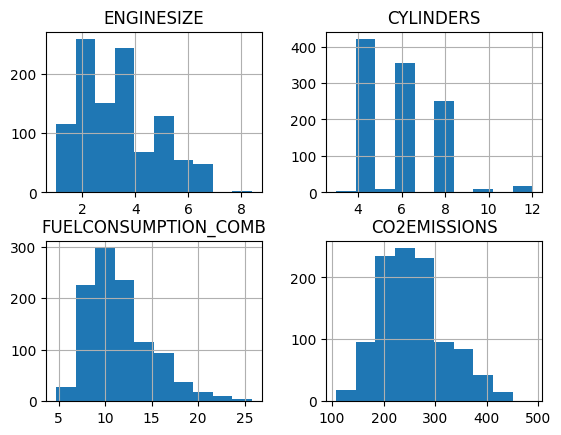

In [ ]:
visual = cdf[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
visual.hist() #histogram
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is

Linear Relation between Fuel comsumption and co2 emssion

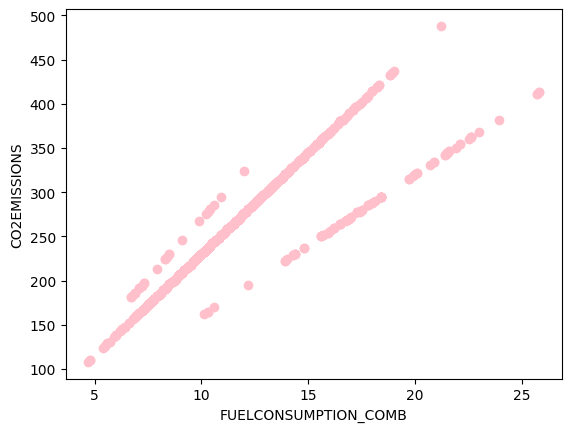

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color ='pink')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

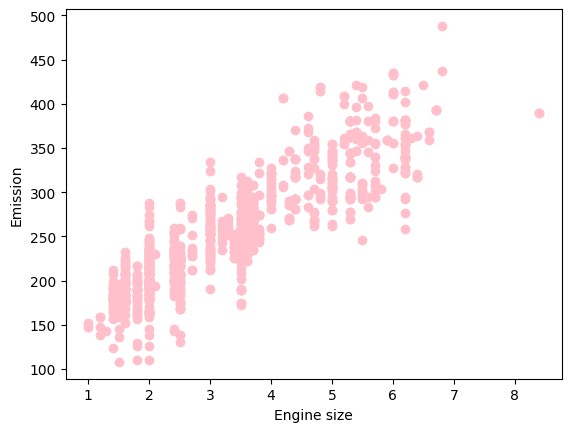

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='pink')
plt.xlabel ("Engine size")
plt.ylabel ("Emission")
plt.show()

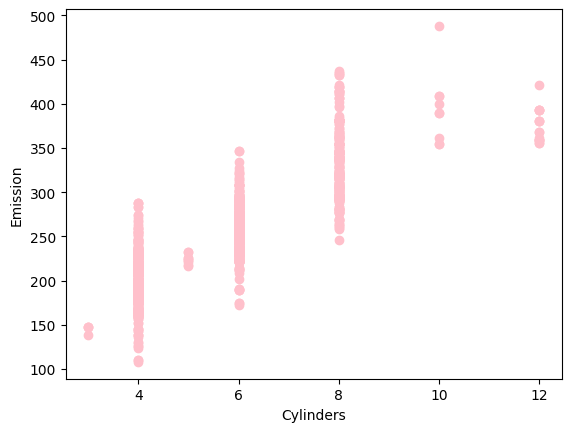

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='pink')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Now to Test and Train the dataset

We'll use 80% data to train and 20% data to test.
Using np.random.rand() function, random rows will be selected from the dataset

In [ ]:
data = np.random.rand(len(df)) < 0.8  # 80% data
train = cdf[data]
test = cdf [~data] #20% data

Train data

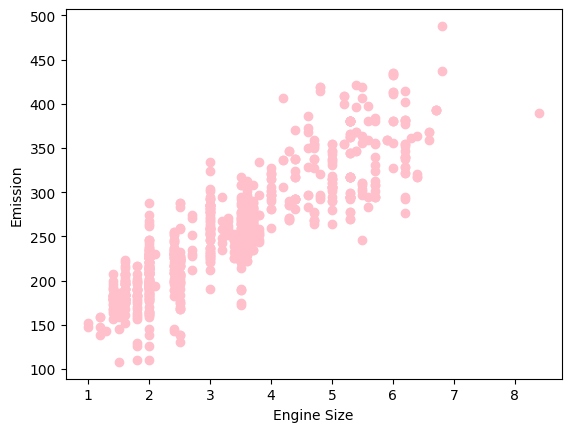

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='pink')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#cofficents and intercept
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[39.86213766]]
Intercept:  [122.97173117]


Ploting the line

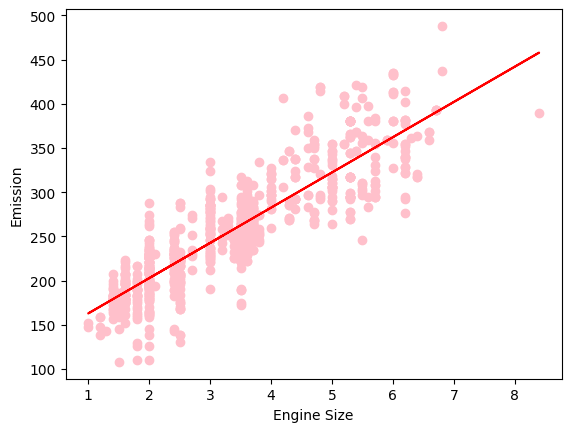

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'pink')
plt.plot (train_x, regr.coef_ [0][0] * train_x + regr.intercept_ [0], '-r') # y = mX+b
plt.xlabel ("Engine Size")
plt.ylabel ("Emission")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

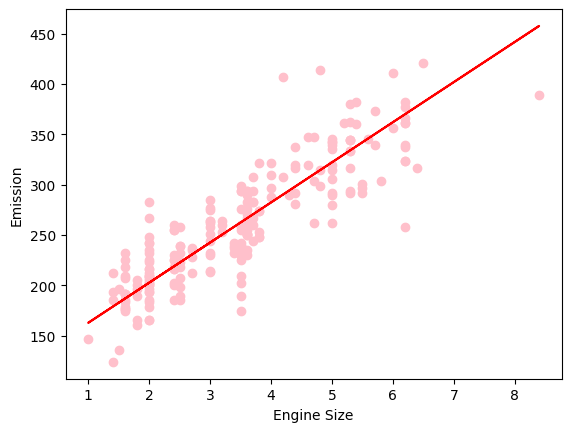

In [ ]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'pink')
plt.plot (test_x, regr.coef_ [0][0] * test_x + regr.intercept_ [0], '-r') # y = mX+b
plt.xlabel ("Engine Size")
plt.ylabel ("Emission")
plt.show()


TO FIND ERROR

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.76
Residual sum of squares (MSE): 907.62
R2-score: 0.75


### **MULTIPLE LINEAR REGRESSION**

In [ ]:
mlr = np.random.rand(len(df)) < 0.8
train = cdf[mlr]
test = cdf[~mlr]

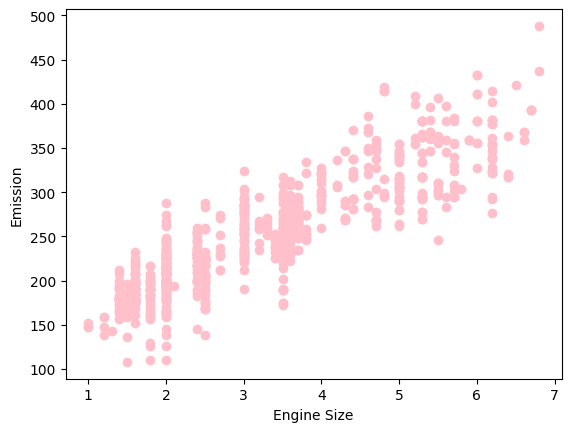

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'pink')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

print("Coefficient: ", regr.coef_)

Coefficient:  [[11.45918594  7.359457    9.32898705]]


Prediction

In [ ]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

In [ ]:
print('Mean Squared Error = %.2f ' %np.mean((y_hat-y)**2))

Mean Squared Error = 555.27 


In [ ]:
print('Variance score: %.2f' % regr.score(x,y))

Variance score: 0.87
